In [2]:
import torch
import torchvision
from torchvision import datasets, transforms

train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = (self.fc4(x))
        return F.log_softmax(x, dim=1)
        
        
        
net = Net()
print(net)        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
X = torch.rand(28,28)
X = X.view(1, 784)
output = net(X)

In [6]:
output

tensor([[-2.3056, -2.2418, -2.3057, -2.3136, -2.2529, -2.2310, -2.2678, -2.3772,
         -2.3498, -2.3948]], grad_fn=<LogSoftmaxBackward>)

In [7]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) 

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad() #zeroing the gradients
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y) #as y is a scalar value
                                    #use nll_loss, 
                #if y was a one-hot vector, use Mean squared error
                
        loss.backward()
        optimizer.step() #this will adjust weights
    print(loss)

tensor(0.5270, grad_fn=<NllLossBackward>)
tensor(0.2406, grad_fn=<NllLossBackward>)
tensor(0.0079, grad_fn=<NllLossBackward>)


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy ", round(correct/total, 3))
    

Accuracy  0.981


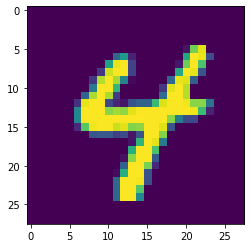

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [12]:
print(torch.argmax(net(X[0].view(-1,28*28))[0]))

tensor(4)
